# <span style="color:#336699">Mineração de Dados Aplicada - Balanceamento de Classes</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 90%;">
    Autores:<br/>
    Flávio Belizário da Silva Mota¹<br/>
    Vanessa Cristina Oliveira de Souza²
    <br/><br/>
    ¹Instituto Nacional de Pesquisas Espaciais (INPE) <br/>
    ²Universidade Federal de Itajubá (UNIFEI)
    <br/>
    <br/>
    Contato: <a href="mailto:flavio.belizario.mota@gmail.com">flavio.belizario.mota@gmail.com</a>
    <br/>
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Objetivo.</b> Esse caderno Jupyter tem como objetivo apresentar métodos práticos de balanceamento de classes com os algoritmos SMOTE e Near Miss.
</div>

# Trabalhando com dados desbalanceados
<hr style="border:2px solid #0077b9;">

Na área do Aprendizado de Máquina e da Ciência de Dados muitas vezes nos deparamos com um termo chamado Desbalanceamento de Dados, que geralmente acontece quando as observações (amostras) em uma das classes são muito maiores ou menores do que as outras classes. Como os algoritmos de Aprendizado de Máquina tendem a aumentar a acurácia através da redução do erro, eles não consideram a distribuição das classes. Este problema acontece com frequência em exemplos como Detecção de Fraudes, Detecção de Anomalias, Reconhecimento Facial, etc.

Técnicas padrão de Aprendizado de Máquina, como Árvores de Decisão e Regressão Logística, têm um viés para a classe majoritária (maior quantidade) e tendem a ignorar a classe minoritária. Eles tendem apenas a prever a classe majoritária, portanto, tendo um grande erro de classificação da classe minoritária em comparação com a classe majoritária. Em palavras mais técnicas, se tivermos uma distribuição de dados desbalanceada em nosso conjunto de dados, nosso modelo se tornará mais propenso ao caso em que a classe minoritária tem uma taxa de revocação insignificante ou muito menor.

Existem principalmente 2 algoritmos que são amplamente utilizados para lidar com a distribuição de classes desbalanceadas:

1. SMOTE
2. NearMiss

## SMOTE
<hr style="border:2px solid #0077b9;">

SMOTE (synthetic minority oversampling technique) é um dos métodos de sobreamostragem mais comumente usados para resolver o problema de desbalanceamento.
Ele visa equilibrar a distribuição de classes aumentando de forma aleatória os exemplos das classes minoritárias, replicando-os.
O SMOTE sintetiza novas instâncias minoritárias entre instâncias as minoritárias existentes, gerando registros virtuais por interpolação linear para a classe minoritária. Esses registros sintéticos são gerados selecionando aleatoriamente um ou mais dos k vizinhos mais próximos para cada exemplo na classe minoritária. Após o processo de sobreamostragem, os dados são reconstruídos e diversos modelos de classificação podem ser aplicados para os dados processados.

Vamos ver um exemplo:

Counter({0: 9900, 1: 100})


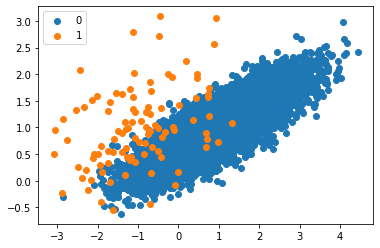

In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

# Cria o conjunto de dados
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# Conta as ocorrências de cada classe
counter = Counter(y)
print(counter)

# Plota os dados
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Podemos notar muito mais ocorrências da classe 0 do que da classe 1. Vamos tentar classificar esse conjunto:

In [2]:
from sklearn.model_selection import train_test_split
  
# Separando em treinamento e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
# Número de registros em cada dataset
print("Nº de registros no conjunto X_train: ", X_train.shape)
print("Nº de registros no conjunto y_train: ", y_train.shape)
print("Nº de registros no conjunto X_test: ", X_test.shape)
print("Nº de registros no conjunto y_test: ", y_test.shape)

Nº de registros no conjunto X_train:  (7000, 2)
Nº de registros no conjunto y_train:  (7000,)
Nº de registros no conjunto X_test:  (3000, 2)
Nº de registros no conjunto y_test:  (3000,)


Classificando:

In [3]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

# Regressão Logística
lr = LogisticRegression()
  
# treinando o modelo
lr.fit(X_train, y_train.ravel())
  
predictions = lr.predict(X_test)
  
# exibindo o relatório de classificação
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2977
           1       1.00      0.43      0.61        23

    accuracy                           1.00      3000
   macro avg       1.00      0.72      0.80      3000
weighted avg       1.00      1.00      0.99      3000



A acurácia desse modelo chega a 100%, mas você notou algo estranho?
O recall da classe minoritária é muito menor. Isso prova que o modelo é mais tendencioso para a classe majoritária. Então, isso prova que este não é o melhor modelo.
Agora, aplicaremos o SMOTE e vamos verificar os resultados para acurácia e  recall:

Classe 1 antes da sobreamostragem: 100
Classe 0 antes da sobreamostragem: 9900 

O formato dos dados de treinamento depois da sobreamostragem: (13860, 2)
O formato dos rótulos de treinamento depois da sobreamostragem: (13860,) 

Classe 1 depois da sobreamostragem: 9900
Classe 0 depois da sobreamostragem: 9900


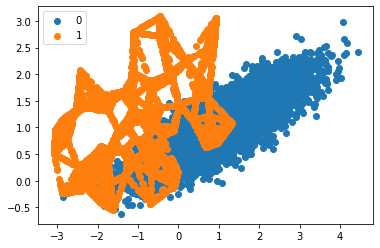

In [4]:
print("Classe 1 antes da sobreamostragem: {}".format(sum(y == 1)))
print("Classe 0 antes da sobreamostragem: {} \n".format(sum(y == 0)))
  
# Importando o SMOTE da biblioteca imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X, y.ravel())

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size = 0.3, random_state = 0)
  
print('O formato dos dados de treinamento depois da sobreamostragem: {}'.format(X_train_res.shape))
print('O formato dos rótulos de treinamento depois da sobreamostragem: {} \n'.format(y_train_res.shape))
  
print("Classe 1 depois da sobreamostragem: {}".format(sum(y_res == 1)))
print("Classe 0 depois da sobreamostragem: {}".format(sum(y_res == 0)))
counter = Counter(y_res)
for label, _ in counter.items():
	row_ix = where(y_res == label)[0]
	pyplot.scatter(X_res[row_ix, 0], X_res[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

O que o SMOTE fez foi aumentar as instâncias da classe minoritária e as tornou igual à classe majoritária. Agora vamos ver os resultados da acurácia e recall após a aplicação do algoritmo SMOTE:

In [5]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test_res)
  
print(classification_report(y_test_res, predictions))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2973
           1       0.92      0.90      0.91      2967

    accuracy                           0.91      5940
   macro avg       0.91      0.91      0.91      5940
weighted avg       0.91      0.91      0.91      5940



A acurácia foi reduzida para 91% em comparação com o modelo anterior, mas o valor de recall da classe minoritária também melhorou para 90%. Este é um bom modelo em comparação com o anterior. 


Agora, vamos aplicar a técnica NearMiss para subamostrar a classe majoritária e ver seus resultados de acurácia e recall.

## NearMiss
<hr style="border:2px solid #0077b9;">

O NearMiss é uma técnica de subamostragem que visa equilibrar a distribuição de classes eliminando de forma aleatória exemplos das classes majoritárias. Quando instâncias de duas classes diferentes estão muito próximas uma da outra, são removidas as instâncias da classe majoritária para aumentar os espaços entre as duas classes. Isso ajuda no processo de classificação.
Para evitar problemas de perda de informação na maioria das técnicas de subamostragem, métodos de vizinhança são amplamente utilizados.

Classe 1 antes da subamostragem: 100
Classe 0 antes da subamostragem': 6923 

O formato dos dados de treinamento depois da subamostragem: (140, 2)
O formato dos rótulos de treinamento depois da subamostragem: (140,) 

Classe 1 depois da subamostragem: 100
Classe 0 depois da subamostragem: 100


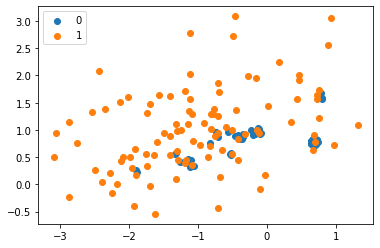

In [6]:
print("Classe 1 antes da subamostragem: {}".format(sum(y == 1)))
print("Classe 0 antes da subamostragem': {} \n".format(sum(y_train == 0)))
  
# Importando o NearMiss da biblioteca imblearn
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_miss, y_miss = nr.fit_resample(X, y.ravel())

X_train_miss, X_test_miss, y_train_miss, y_test_miss = train_test_split(X_miss, y_miss, test_size = 0.3, random_state = 0)
  
print('O formato dos dados de treinamento depois da subamostragem: {}'.format(X_train_miss.shape))
print('O formato dos rótulos de treinamento depois da subamostragem: {} \n'.format(y_train_miss.shape))
  
print("Classe 1 depois da subamostragem: {}".format(sum(y_miss == 1)))
print("Classe 0 depois da subamostragem: {}".format(sum(y_miss == 0)))
counter = Counter(y_miss)
for label, _ in counter.items():
	row_ix = where(y_miss == label)[0]
	pyplot.scatter(X_miss[row_ix, 0], X_miss[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

O algoritmo NearMiss subamostra as instâncias majoritárias e as tornam iguais à classe minoritária. Agora vamos ver os resultados da acurácia e recall após a aplicação do algoritmo:


In [7]:
lr2 = LogisticRegression()
lr2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(X_test_miss)
  
print(classification_report(y_test_miss, predictions))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.85      0.71      0.77        31

    accuracy                           0.78        60
   macro avg       0.79      0.79      0.78        60
weighted avg       0.79      0.78      0.78        60



Com o NearMiss a acurácia foi reduzida para 78% em comparação com o primeiro modelo, mas o valor de recall da classe minoritária melhorou para 71%. Aqui é interessante notar uma queda no recall da classe anteriormente majoritária para 86%.

## Referências

[Biblioteca imblearn](https://imbalanced-learn.org/stable/)
